<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/Clase_3_Medidas_de_tendencia_central_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MEDIA
La media es el valor medio de un conjunto de números
###Mediana
Valor central de un conjunto de atos ordeanods de menor a mayor generalmente

####Medidas de tendencia central
1. Trabajndo con dataframes
2. Overview de los datos
3. Obtener las medidas centrales
4, aNALIXAR GRAFICAS

In [2]:
!pip install statsmodels

In [3]:
!pip install wquantiles

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
estado=pd.read_csv("/content/state.csv")
#Ver los 5 primeros registros
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [15]:
#Extraer n datos aleatorios
estado.sample(5)

,State,Population,Murder.Rate,Abbreviation
26,Nebraska,1826341,2.9,NE
33,North Dakota,672591,3.0,ND
45,Virginia,8001024,4.1,VA
5,Colorado,5029196,2.8,CO
19,Maryland,5773552,6.1,MD


In [16]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Overview de los datos
Analizar las comlumnas presentres en el dataframe

In [18]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [19]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [20]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


###2.1 Estimando las tasas de ppoblación y asesinatos

In [21]:
estado["Population"].mean()

np.float64(6162876.3)

In [22]:
estado["Population"].median()

4436369.5

In [27]:
#Media truncada
trim_mean(estado.Population,0.1)

np.float64(4783697.125)

In [31]:
estado["Murder.Rate"].mean()

np.float64(4.066)

In [30]:
#Media ponderada de asesinatos
np.average(estado["Murder.Rate"],weights=estado.Population)

np.float64(4.445833981123393)

In [32]:
#Mediana pondera de asesinatos
wquantiles.median(estado["Murder.Rate"],weights=estado.Population)

np.float64(4.4)

<Axes: >

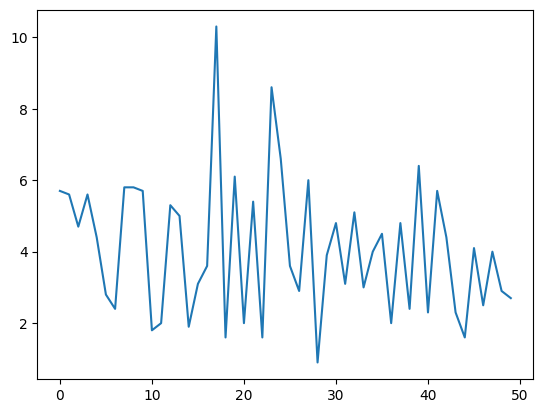

In [33]:
estado["Murder.Rate"].plot.line()

<Axes: >

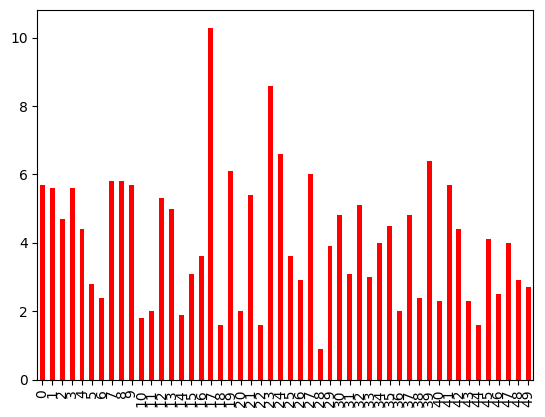

In [35]:
estado["Murder.Rate"].plot.bar(color="red")

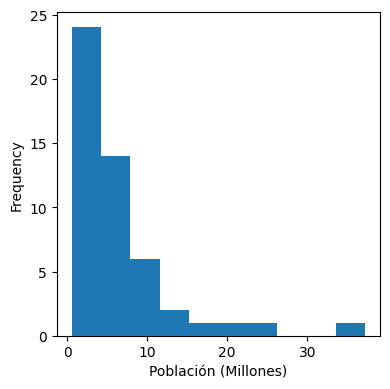

In [39]:
ax=(estado.Population/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (Millones)")
plt.tight_layout()
plt.show()

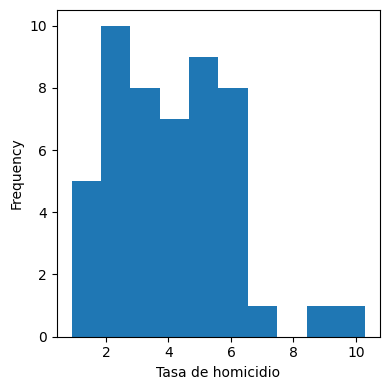

In [40]:
ax=(estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de homicidio")
plt.tight_layout()
plt.show()

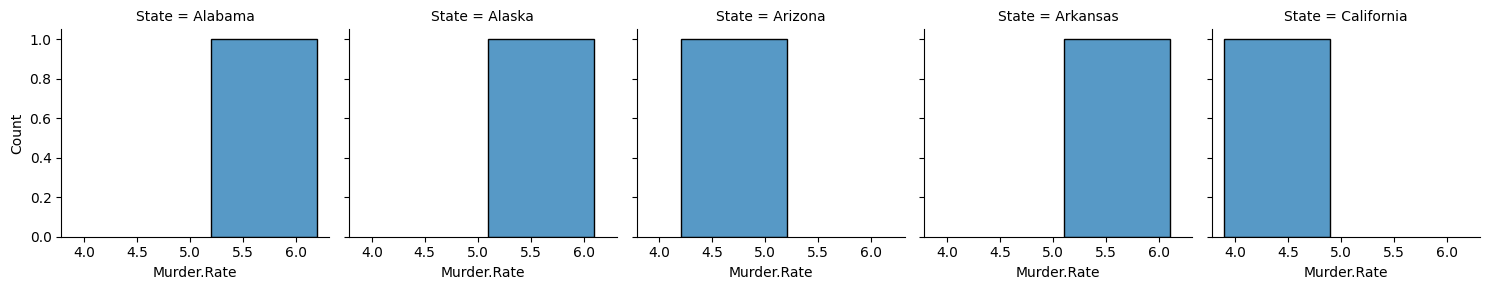

In [48]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.histplot,"Murder.Rate")